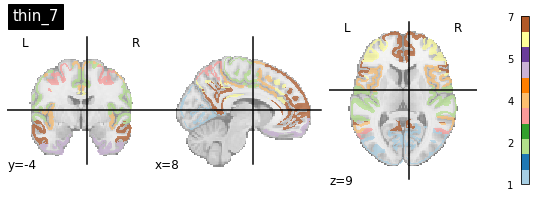

In [19]:
from nilearn import datasets
from nilearn import image as nimg
from nilearn import plotting as nplot

%matplotlib inline

parcel_dir = '../resources/rois/'
atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011(parcel_dir)
atlas_yeo_2011.keys()

#Define where to slice the image
cut_coords=(8, -4, 9)
#Show a colorbar
colorbar=True
#Color scheme to show when viewing image
cmap='Paired'

#Plot all parcellation schemas referred to by atlas_yeo_2011
nplot.plot_roi(atlas_yeo_2011['thin_7'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thin_7')


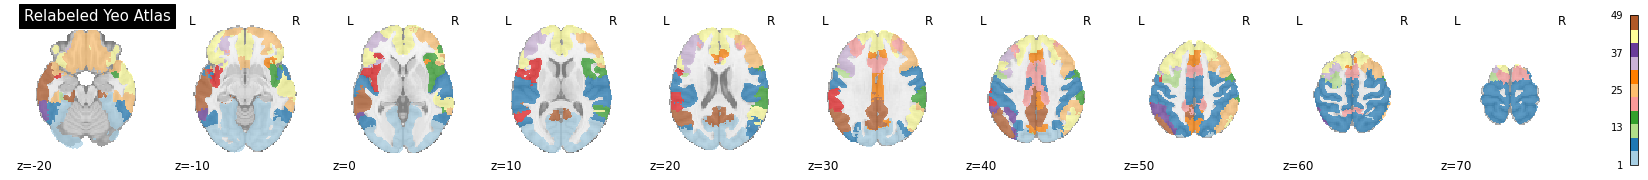

In [20]:
atlas_yeo = atlas_yeo_2011['thick_7']
from nilearn.regions import connected_label_regions
region_labels = connected_label_regions(atlas_yeo)
nplot.plot_roi(region_labels,
			cut_coords=(-20,-10,0,10,20,30,40,50,60,70),
			display_mode='z',
			colorbar=True,
			cmap='Paired',
			title='Relabeled Yeo Atlas')

In [21]:
region_labels.to_filename('../resources/rois/yeo_2011/Yeo_JNeurophysiol11_MNI152/relabeled_yeo_atlas.nii.gz')

In [22]:
print("Size of atlas image:", region_labels.shape)


Size of atlas image: (256, 256, 256)


In [23]:
import os
import nibabel as nib
Filepath = '/Users/dragon/Downloads/BREATHE'
fmripath = os.path.join(Filepath, 'fmri')
ecgpath = os.path.join(Filepath, 'ecg')
func_img = nib.load(os.path.join(fmripath, 's106/final.feat/filtered_func_data.nii.gz'))

In [24]:
print("Size of functional image:", func_img.shape)
print("Size of atlas image:", region_labels.shape)

resampled_yeo = nimg.resample_to_img(region_labels, func_img, interpolation = 'nearest')

Size of functional image: (128, 128, 80, 300)
Size of atlas image: (256, 256, 256)


Size of functional image: (128, 128, 80)


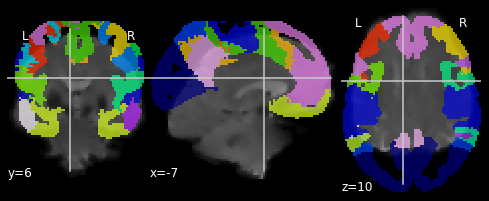

In [25]:
nplot.plot_roi(resampled_yeo, func_img.slicer[:, :, :, 52])
print("Size of functional image:", resampled_yeo.shape)